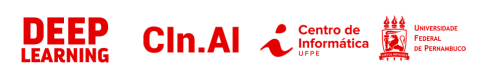

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd

Considerando o conjunto de dados estruturados que utilizamos anteriormente:

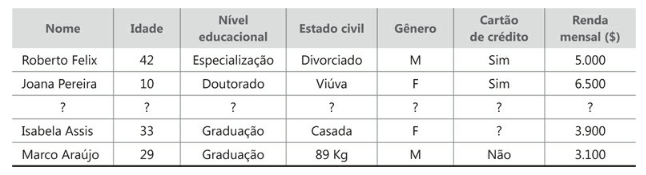

A única transformação que realizamos nos dados textuais foi a codificação: transformando os dados categóricos em inteiros.
Veja o exemplo a seguir.

# One-hot Encoder

In [ ]:
# Para codificação one-hot encoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
nivel_educacional = np.array(['Fundamental', 'Médio', 'Graduação', 'Especialização', 'Mestrado', 'Doutorado'])
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
onehot_nivel_educacional = onehot_encoder.fit_transform(nivel_educacional.reshape(-1, 1))
print(onehot_nivel_educacional)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [ ]:
print(onehot_encoder.inverse_transform([[1., 0., 0., 0., 0., 0.]]))

[['Doutorado']]


# Bag-of-Words

In [ ]:
# Para codificação Bag-of-words
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
doc1 = "Doctor Who é uma série de TV maravilhosa! Já assisti a todos os episódios."
doc2 = "Doctor Who é a melhor série de TV!"
doc3 = "Doctor Who é muito boa."

corpus = [doc1, doc2, doc3]

In [ ]:
# Usa o tf como peso das palavras
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['assisti' 'boa' 'de' 'doctor' 'episódios' 'já' 'maravilhosa' 'melhor'
 'muito' 'os' 'série' 'todos' 'tv' 'uma' 'who']


In [ ]:
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,assisti,boa,de,doctor,episódios,já,maravilhosa,melhor,muito,os,série,todos,tv,uma,who
0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1
1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1


# TF-IDF

In [ ]:
# Para codificação TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
doc1 = "Doctor Who é uma série de TV maravilhosa! Já assisti todos os episódios."
doc2 = "Doctor Who é a melhor série de TV!"
doc3 = "Doctor Who é muito boa."

corpus = [doc1, doc2, doc3]

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf_vectorize = tfidf_vectorizer.fit_transform(corpus)

In [ ]:
df_tf_idf = pd.DataFrame(X_train_tfidf_vectorize.toarray(), columns=tfidf_vectorizer.get_feature_names())
df_tf_idf.shape

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(3, 15)

In [ ]:
df_tf_idf.head()

,assisti,boa,de,doctor,episódios,já,maravilhosa,melhor,muito,os,série,todos,tv,uma,who
0,0.325596,0.000000,0.247624,0.192302,0.325596,0.325596,0.325596,0.000000,0.000000,0.325596,0.247624,0.325596,0.247624,0.325596,0.192302
1,0.000000,0.000000,0.410475,0.318770,0.000000,0.000000,0.000000,0.539725,0.000000,0.000000,0.410475,0.000000,0.410475,0.000000,0.318770
2,0.000000,0.608845,0.000000,0.359594,0.000000,0.000000,0.000000,0.000000,0.608845,0.000000,0.000000,0.000000,0.000000,0.000000,0.359594


# [APLICAÇÃO] Utilizando as representações em modelos de Machine Learning

In [ ]:
# Utilizando dataset de notícias do Sklearn
from sklearn.datasets import fetch_20newsgroups

# Representação de palavras

# Para codificação one-hot encoder
from sklearn.preprocessing import OneHotEncoder

# Para codificação Bag-of-words
from sklearn.feature_extraction.text import CountVectorizer

# Para codificação TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelos
from	sklearn.naive_bayes	import	MultinomialNB

# métricas
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
categorias = ['sci.electronics', 'sci.med', 'sci.space']

In [ ]:
train_data = fetch_20newsgroups(subset='train', categories=categorias, shuffle=True, random_state=42)

In [ ]:
print(len(train_data.data))

1778


In [ ]:
print(train_data.data[0])
print("Target: ", train_data.target[0])

From: landis@stsci.edu (Robert Landis,S202,,)
Subject: Re: Space Debris
Reply-To: landis@stsci.edu
Organization: Space Telescope Science Institute, Baltimore MD
Lines: 14

Another fish to check out is Richard Rast -- he works
for Lockheed Missiles, but is on-site at NASA Johnson.

Nick Johnson at Kaman Sciences in Colo. Spgs and his
friend, Darren McKnight at Kaman in Alexandria, VA.

Good luck.

R. Landis

"Behind every general is his wife.... and...
 behind every Hillary is a Bill . ."



Target:  2


In [ ]:
#vectorizer = CountVectorizer()    # tf
vectorizer = TfidfVectorizer()    # tf-idf

train_ = train_data.data

X_train_tfidf_vectorize = vectorizer.fit_transform(train_)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train_tfidf_vectorize, train_data.target)

MultinomialNB()

### Avaliando o modelo no conjunto de teste

In [ ]:
test_data = fetch_20newsgroups(subset='test', categories=categorias, shuffle=True, random_state=42)
docs_test = test_data.data

vect_transform = vectorizer.transform(docs_test)
predicted = clf.predict(vect_transform)

print(metrics.classification_report(test_data.target, predicted, target_names=test_data.target_names))

print(clf.classes_)

                 precision    recall  f1-score   support

sci.electronics       0.95      0.90      0.92       393
        sci.med       0.94      0.94      0.94       396
      sci.space       0.92      0.97      0.94       394

       accuracy                           0.94      1183
      macro avg       0.94      0.94      0.94      1183
   weighted avg       0.94      0.94      0.94      1183

[0 1 2]


# Embeddings


## Utilizando modelos pré-treinados: Glove



In [ ]:
# Para utilização dos modelos de word embeddings pré-treinados
import gensim.downloader

In [ ]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

[===============================================---] 95.2% 62.8/66.0MB downloaded


## Visualizando os Embeddings

In [ ]:
glove_vectors.wv['computer']

<ipython-input-50-e22852a42941>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  glove_vectors.wv['computer']


array([ 0.079084, -0.81504 ,  1.7901  ,  0.91653 ,  0.10797 , -0.55628 ,
       -0.84427 , -1.4951  ,  0.13418 ,  0.63627 ,  0.35146 ,  0.25813 ,
       -0.55029 ,  0.51056 ,  0.37409 ,  0.12092 , -1.6166  ,  0.83653 ,
        0.14202 , -0.52348 ,  0.73453 ,  0.12207 , -0.49079 ,  0.32533 ,
        0.45306 , -1.585   , -0.63848 , -1.0053  ,  0.10454 , -0.42984 ,
        3.181   , -0.62187 ,  0.16819 , -1.0139  ,  0.064058,  0.57844 ,
       -0.4556  ,  0.73783 ,  0.37203 , -0.57722 ,  0.66441 ,  0.055129,
        0.037891,  1.3275  ,  0.30991 ,  0.50697 ,  1.2357  ,  0.1274  ,
       -0.11434 ,  0.20709 ], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
palavras = ['computer', 'science', 'software', 'intelligence', 'internet', 'car', 'bike', 'truck']
vetores = glove_vectors[palavras]

vetores_2d = PCA(random_state=0).fit_transform(vetores)[:, :2]

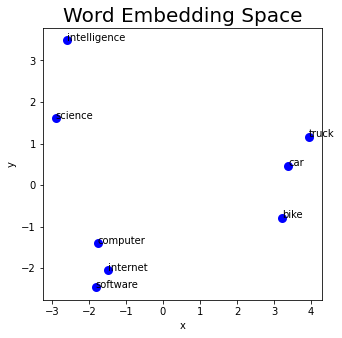

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(vetores_2d[:,0], vetores_2d[:,1], linewidths=3, color='blue')
plt.xlabel("x", size = 10)
plt.ylabel("y", size = 10)
plt.title("Word Embedding Space", size = 20)

for i, word in enumerate(palavras):
  plt.annotate(word, xy = (vetores_2d[i, 0], vetores_2d[i, 1]))

## Analisando Similaridades entre as palavras

In [ ]:
glove_vectors.most_similar("computer", topn=5)

[('computers', 0.9165046215057373),
 ('software', 0.8814994096755981),
 ('technology', 0.852556049823761),
 ('electronic', 0.812586784362793),
 ('internet', 0.8060455322265625)]

In [ ]:
glove_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

[('queen', 0.8523603677749634)]

# [APLICAÇÃO] Utilizando embeddings de palavras pré-treinados para classificação de sentimento

*   Carregamento e Pré-processamento de Dataset do mundo real
*   Adaptando o Treino do modelo de embeddings Word2Vec
*   Split dos dados
*   Definição e Treino de uma rede neural simples



## Carregando e pré-processando a nossa base de dados

In [ ]:
# Baixando o subconjunto de reviews da Amazon.
# Conjunto de dados obtido de https://nijianmo.github.io/amazon/index.html
!wget https://github.com/ProfLuciano/pln_dl/raw/main/datasets/AMAZON_FASHION_5.json.gz

# descompactando o arquivo
!gzip -d AMAZON_FASHION_5.json.gz

import json

# carrega os objetos json para uma lista
reviews = []
for review in open("AMAZON_FASHION_5.json", "r"):
  reviews.append(json.loads(review))

# Cria um dataframe apenas com as informações necessárias para a tarefa
# no caso o texto da review e a avaliação do produto (dada em estrelas)
reviews_only = []
for r in reviews:
  if set(["reviewText", "overall"]).issubset(r.keys()):
    reviews_only.append({'review': r['reviewText'],
                        'rating': r['overall'], })

# cria um dataframe para facilitar a manipulação dos dados
reviews_df = pd.DataFrame(reviews_only)

# visualizar uma amostra dos dados
reviews_df.sample(5)

--2023-03-01 13:29:54--  https://github.com/ProfLuciano/pln_dl/raw/main/datasets/AMAZON_FASHION_5.json.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ProfLuciano/pln_dl/main/datasets/AMAZON_FASHION_5.json.gz [following]
--2023-03-01 13:29:55--  https://raw.githubusercontent.com/ProfLuciano/pln_dl/main/datasets/AMAZON_FASHION_5.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287013 (280K) [application/octet-stream]
Saving to: ‘AMAZON_FASHION_5.json.gz’

AMAZON_FASHION_5.js 100%[===================>] 280.29K  --.-KB/s    in 0.03s   

2023-03-01 13:29:55 (8.34 MB/s) - ‘AMAZON_FASHION_5.

,review,rating
1459,Great shoes - was looking for something to rep...,5.0
1643,Exactly what I expected! Comfortable and chic,5.0
3116,"I wear these everyday to work, the gym, etc.",5.0
864,I've had these shoes for about a week now and ...,5.0
2578,They are super comfortable. Loving them.,5.0


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  3160 non-null   object 
 1   rating  3160 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [ ]:
# Pré-processamento textual antes de treinar o modelo Word2Vec
import nltk
from nltk.tokenize import word_tokenize
# tokenizador de sentença do nltk
nltk.download('punkt')

tokenized_sents = [word_tokenize(i) for i in reviews_df['review'].values]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Treino do modelo Word2Vec

In [ ]:
from gensim.models import Word2Vec
model_review = Word2Vec(tokenized_sents, size=50, window=5, min_count=1, workers=4)

In [ ]:
model_review['hat']

<ipython-input-7-5c938e3bc405>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model_review['hat']


array([-0.00355744, -0.00572699, -0.01052364,  0.02562819,  0.01144714,
        0.00355689, -0.02918301, -0.00073421,  0.00981481, -0.01916788,
        0.00097568,  0.0108551 ,  0.01827321,  0.01043456, -0.00203232,
       -0.01752962, -0.01615608,  0.03259178,  0.01306422, -0.0109476 ,
       -0.01135825,  0.02003786, -0.01583643,  0.00574287,  0.03660333,
       -0.0114878 , -0.02194424,  0.00217908, -0.01136864, -0.0066641 ,
       -0.00406634,  0.01182023,  0.00548195,  0.00904527, -0.00117609,
       -0.01879792,  0.00528793, -0.00124014,  0.00777389,  0.00657001,
       -0.00676198,  0.00094216, -0.01541523,  0.00196367, -0.02123645,
       -0.01336071,  0.02195084,  0.01345594,  0.02336604, -0.02671848],
      dtype=float32)

In [ ]:
model_review['shoe']

<ipython-input-8-fc4f22b1d59f>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model_review['shoe']


array([-0.49477142,  0.05496669, -0.22460416,  0.71990746,  0.45306152,
        0.02336722, -0.9434491 ,  0.2864619 ,  0.07732098, -0.6706872 ,
       -0.2132533 ,  0.23898159,  0.63412267,  0.3277014 , -0.32120165,
       -0.38294807, -0.41627425,  0.8952443 ,  0.17796929,  0.11879678,
       -0.46798566,  0.6732172 , -0.42535773, -0.15283033,  0.9793944 ,
       -0.06321617, -0.5893382 ,  0.34862122, -0.05237593, -0.15191843,
       -0.41143373,  0.2838313 ,  0.3358493 ,  0.65169084,  0.0583189 ,
       -0.2435538 ,  0.36810565, -0.04135154,  0.38769084,  0.34414208,
       -0.14444745, -0.29796335, -0.51254326,  0.32641348, -0.56094617,
       -0.5710239 ,  0.6435005 ,  0.68602616,  0.73040336, -0.79139036],
      dtype=float32)

## Mais pré-processamento...


In [ ]:
# Verificando o tamanho máximo do texto não estruturado (review)
X, y = [], []
max_len = 0

for i, row in reviews_df.iterrows():
  vetores = model_review[word_tokenize(row['review'])]

  max_len = max(max_len, len(vetores))
  X.append(vetores)
  y.append(row['rating']-1)
print("max_len: {}".format(max_len))

<ipython-input-9-9a73201d4237>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vetores = model_review[word_tokenize(row['review'])]


max_len: 311


In [ ]:
# Devemos utilizar um padding para padronizar o tamanho das nossas reviews em max_len.
# Isso é necessário para fazer o treino da rede neural

def transform(exemplos, dimension):
  results = np.zeros((len(exemplos), dimension, 50))
  for i, sequence in enumerate(exemplos):
    results[i, :len(sequence), :] = sequence
  return results

X = transform(X, max_len)
y = np.array(y).astype("float32")

In [ ]:
# Verificando o shape dos dados pré-processados (instâncias,tokens,num de dimensões do embedding)
X.shape

(3160, 311, 50)

## Split dos dados

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Definição da arquitetura da nossa rede neural

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential()
model.add(Flatten(input_shape=(max_len, 50)))
model.add(Dense(1000, activation='relu')),
model.add(Dropout(0.3))
model.add(Dense(1000, activation='relu')),
model.add(Dropout(0.3))
model.add(Dense(1000, activation='relu')),
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15550)             0         
                                                                 
 dense (Dense)               (None, 1000)              15551000  
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 5)                 5

In [ ]:
model.compile(
 optimizer = "adam",
 loss = "sparse_categorical_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
results = model.fit(
 X_train, y_train,
 epochs= 5,
 batch_size = 100,
 validation_data = (X_test, y_test)
)

Epoch 1/5
23/23 [==============================] - 10s 343ms/step - loss: 1.1323 - accuracy: 0.6510 - val_loss: 0.8473 - val_accuracy: 0.6635
Epoch 2/5
23/23 [==============================] - 5s 233ms/step - loss: 0.7718 - accuracy: 0.7184 - val_loss: 0.6828 - val_accuracy: 0.7416
Epoch 3/5
23/23 [==============================] - 6s 268ms/step - loss: 0.6296 - accuracy: 0.7604 - val_loss: 0.5474 - val_accuracy: 0.8112
Epoch 4/5
23/23 [==============================] - 6s 235ms/step - loss: 0.4505 - accuracy: 0.8287 - val_loss: 0.4152 - val_accuracy: 0.8228
Epoch 5/5
23/23 [==============================] - 6s 245ms/step - loss: 0.3429 - accuracy: 0.8734 - val_loss: 0.3397 - val_accuracy: 0.8819
